In [47]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import rapids_singlecell as rsc
ov.ov_plot_set()

In [420]:
ov.ov_plot_set()

In [19]:
cell_cycle_genes = [x.strip() for x in open('../baby_analysis/regev_lab_cell_cycle_genes.txt')]
#adata_raw=adata.raw.to_adata()
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

In [21]:
g2m_genes

['HMGB2',
 'CDK1',
 'NUSAP1',
 'UBE2C',
 'BIRC5',
 'TPX2',
 'TOP2A',
 'NDC80',
 'CKS2',
 'NUF2',
 'CKS1B',
 'MKI67',
 'TMPO',
 'CENPF',
 'TACC3',
 'FAM64A',
 'SMC4',
 'CCNB2',
 'CKAP2L',
 'CKAP2',
 'AURKB',
 'BUB1',
 'KIF11',
 'ANP32E',
 'TUBB4B',
 'GTSE1',
 'KIF20B',
 'HJURP',
 'CDCA3',
 'HN1',
 'CDC20',
 'TTK',
 'CDC25C',
 'KIF2C',
 'RANGAP1',
 'NCAPD2',
 'DLGAP5',
 'CDCA2',
 'CDCA8',
 'ECT2',
 'KIF23',
 'HMMR',
 'AURKA',
 'PSRC1',
 'ANLN',
 'LBR',
 'CKAP5',
 'CENPE',
 'CTCF',
 'NEK2',
 'G2E3',
 'GAS2L3',
 'CBX5',
 'CENPA']

In [26]:
ov.ov_plot_set()

In [3]:
adata=sc.read('data/Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad')
adata

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'assay', 'authors', 'disease', 'organism', 'preprint', 'short_name', 'tissue'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix', 'norm_data', 'scale_data'

In [4]:
adata.raw

In [5]:
del adata.uns
del adata.layers['norm_data']


In [6]:
del adata.layers['scale_data']

In [7]:
adata

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix'

In [477]:
adata.write('data/covid.h5ad',compression='gzip')
adata

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler', 'final_celltype_type', 'SEACell'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'Status_colors', 'cell_type_fine_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix', 'normlog'
    obsp: 'distances', 'connectivities'

In [49]:
adata=sc.read('data/covid.h5ad')
adata

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler', 'final_celltype_type', 'SEACell'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'Status_colors', 'cell_type_fine_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix', 'normlog'
    obsp: 'connectivities', 'distances'

In [3]:
adata.X.max()

7.449498

In [4]:
adata.layers['matrix'].max()

1718.0

In [50]:
adata.obs['Status'].value_counts()

COVID      28094
Healthy    16627
Name: Status, dtype: int64

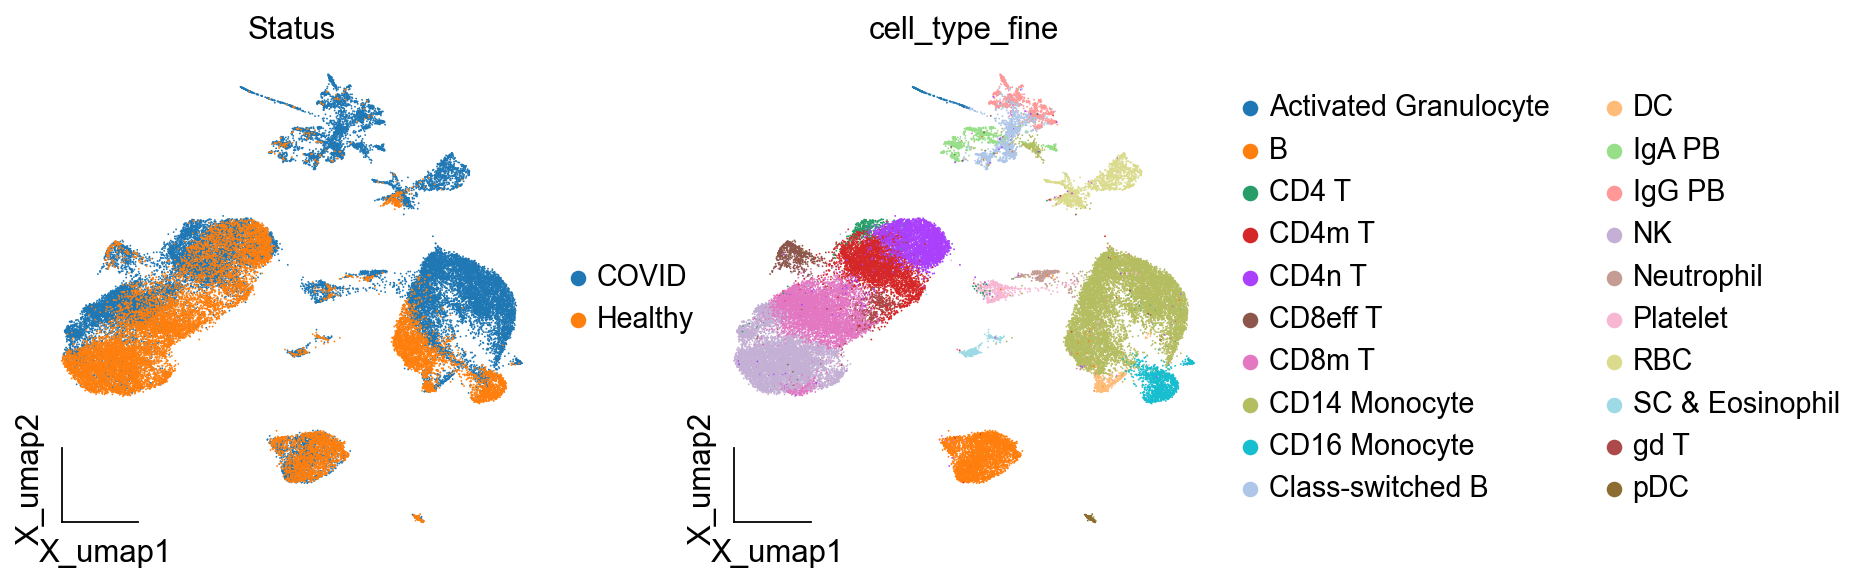

In [404]:
ov.utils.embedding(
    adata,
    basis="X_umap",
    color=["Status","cell_type_fine"],
    frameon='small',
    ncols=3,
)

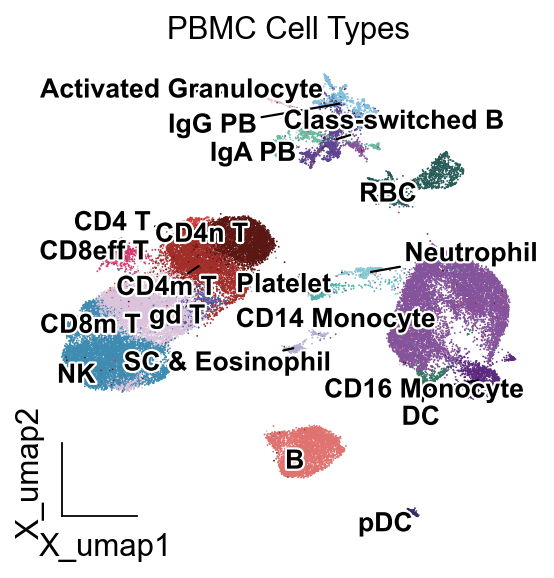

In [448]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(adata,
                  basis='X_umap',
                  color=['cell_type_fine'],
                title='PBMC Cell Types',
                   show=False, legend_loc=None, add_outline=False, 
                palette=ov.pl.red_color+ov.pl.blue_color+ov.pl.green_color,
                   frameon='small',legend_fontoutline=2,ax=ax
                 )

ov.pl.embedding_adjust(
    adata,
    groupby='cell_type_fine',
    exclude=("None",),  
    basis='X_umap',
    ax=ax,
    adjust_kwargs=dict(arrowprops=dict(arrowstyle='-', color='black')),
    text_kwargs=dict(fontsize=12 ,weight='bold',
                     path_effects=[patheffects.withStroke(linewidth=2, foreground='w')] ),
)

plt.savefig('figures/umap_celltype.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/umap_celltype.pdf',dpi=300,bbox_inches='tight')


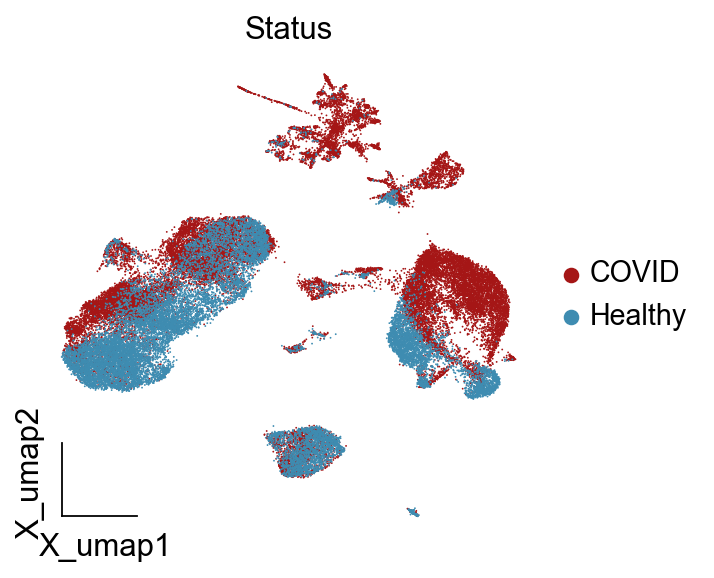

In [409]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize = (4,4))

ov.pl.embedding(adata,
                basis='X_umap',
                color=['Status'],
                frameon='small',
                show=False,
                palette=['#a51616',ov.pl.blue_color[3]],
                ax=ax)
plt.savefig('figures/umap_status.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/umap_status.pdf',dpi=300,bbox_inches='tight')


In [10]:
import spaco
import scanpy as sc # For visualization
#import squidpy as sq # For loading example dataset

# loading data
palette_default = [
            "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
            "#D55E00", "#CC79A7", "#666666", "#AD7700", "#1C91D4",
            "#007756", "#D5C711", "#005685", "#A04700", "#B14380",
            "#4D4D4D", "#FFBE2D", "#80C7EF", "#00F6B3", "#F4EB71",
            "#06A5FF", "#FF8320", "#D99BBD", "#8C8C8C"
        ][:len(list(set(adata.obs['cell_type_fine'].tolist())))]

# color assignment with default palette
color_mapping = spaco.colorize(
    cell_coordinates=adata.obsm['X_umap'],
    cell_labels=adata.obs['cell_type_fine'],
    colorblind_type='none',
    palette=palette_default,
    radius=0.05,
    n_neighbors=30,
)



|-----> Calculating cluster distance graph...
|-----------> Calculating cell neighborhood...
|-----------> Filtering out neighborhood outliers...
|-----------> Calculating cluster interlacement score...
|-----------> Constructing cluster interlacement graph...
|-----> Calculating color distance graph...
|-----------> Calculating color perceptual distance...
|-----------> Constructing color distance graph...
|-----------> Difference of the most similar pair in the palette is 69.09
|-----> Optimizing color mapping...


In [ ]:
def optim_palette(adata,basis,colors,palette=None,**kwargs):
    if (adata.uns[f'{colors}_colors'] is None) and (palette is None):
        palette_t=[
            "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
            "#D55E00", "#CC79A7", "#666666", "#AD7700", "#1C91D4",
            "#007756", "#D5C711", "#005685", "#A04700", "#B14380",
            "#4D4D4D", "#FFBE2D", "#80C7EF", "#00F6B3", "#F4EB71",
            "#06A5FF", "#FF8320", "#D99BBD", "#8C8C8C"
        ][:len(list(set(adata.obs[colors].tolist())))]
    elif palette!= None:
        palette_t=palette_t[:len(list(set(adata.obs[colors].tolist())))]
    else:
        palette_t=adata.uns[f'{colors}_colors']
        
    import spaco
    color_mapping = spaco.colorize(
        cell_coordinates=adata.obsm[basis],
        cell_labels=adata.obs[colors],
        colorblind_type='none',
        palette=palette_t,
        **kwargs
    )
    # Order colors by categories in adata
    adata.obs[colors]=adata.obs[colors].astype('category')
    
    color_mapping = {k: color_mapping[k] for k in adata.obs[colors].cat.categories}
    palette_spaco = list(color_mapping.values())
    return palette_spaco
    

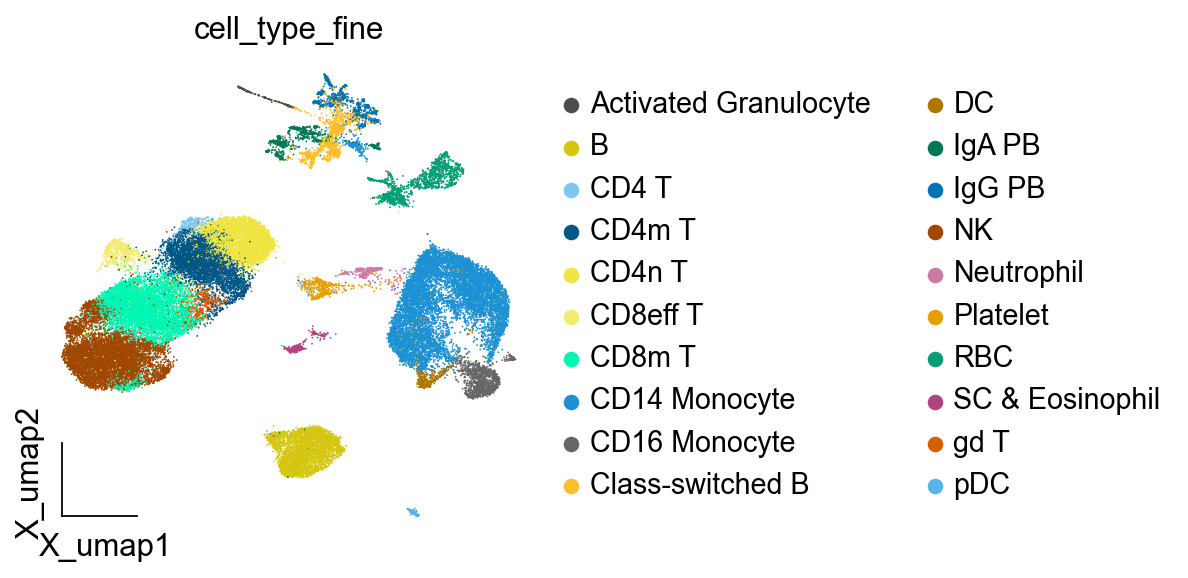

In [11]:
# Order colors by categories in adata
color_mapping = {k: color_mapping[k] for k in adata.obs['cell_type_fine'].cat.categories}
palette_spaco = list(color_mapping.values())

ov.utils.embedding(
    adata,
    basis="X_umap",
    color=["cell_type_fine"],
    frameon='small',
    palette=palette_spaco,
    ncols=3,
)

In [417]:
adata.obs['final_celltype_type']=[i+'-'+j for i,j in zip(adata.obs['cell_type_fine'],
                                                           adata.obs['Status'])]
import random
#ell_idx=random.sample(adata_sub.obs.index.tolist(),30000)
#data_sub=adata_sub[cell_idx]
meta_obj=ov.single.MetaCell(adata,use_rep='X_pca',n_metacells=adata.shape[0]//100,
                       use_gpu=True)
meta_obj.initialize_archetypes()


Welcome to SEACells GPU!
Computing kNN graph using scanpy NN ...
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
Computing radius for adaptive bandwidth kernel...


  0%|          | 0/44721 [00:00<?, ?it/s]

Making graph symmetric...
Parameter graph_construction = union being used to build KNN graph...
Computing RBF kernel...


  0%|          | 0/44721 [00:00<?, ?it/s]

Building similarity LIL matrix...


  0%|          | 0/44721 [00:00<?, ?it/s]

Constructing CSR matrix...
Building kernel on X_pca
Computing diffusion components from X_pca for waypoint initialization ... 
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)
Done.
Sampling waypoints ...
Done.
Selecting 420 cells from waypoint initialization.
Initializing residual matrix using greedy column selection
Initializing f and g...


100%|██████████| 37/37 [00:01<00:00, 26.45it/s]

Selecting 27 cells from greedy initialization.


In [418]:
meta_obj.train(min_iter=10, max_iter=50)
meta_obj.save(f'result/metacells_model.pkl')


Randomly initialized A matrix.
Setting convergence threshold at 0.37679
Starting iteration 1.
Completed iteration 1.
Starting iteration 10.
Completed iteration 10.
Converged after 11 iterations.


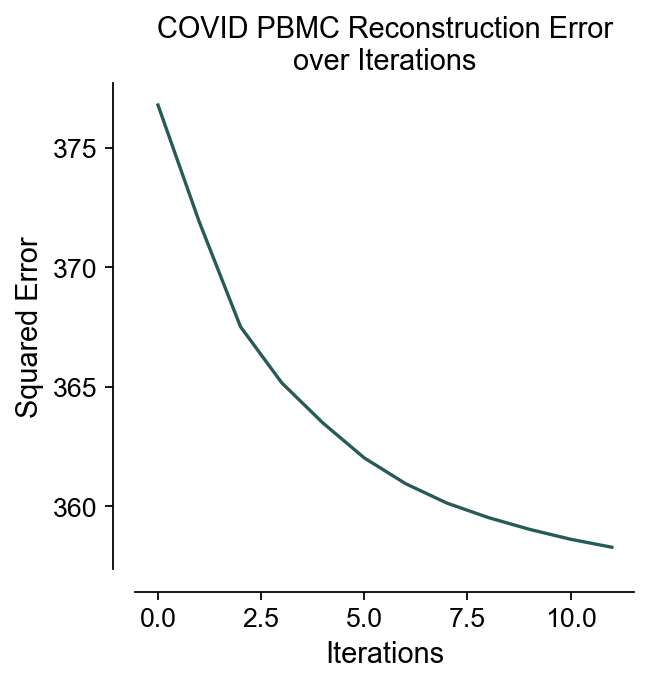

In [423]:
# Check for convergence 

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(meta_obj.model.RSS_iters,color=ov.utils.blue_color[6])
plt.title("COVID PBMC Reconstruction Error\nover Iterations",fontsize=13)
plt.xlabel("Iterations",fontsize=13)
plt.ylabel("Squared Error",fontsize=13)
#plt.title('Celltype Purity')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("figures/sea_loss.png",dpi=300,bbox_inches = 'tight')
plt.savefig("figures/sea_loss.pdf",dpi=300,bbox_inches = 'tight')


In [ ]:
import pickle
with open('result/metacells_model.pkl', "rb") as f:
    meta_obj.model=pickle.load(f)
    meta_obj.M = meta_obj.model.kernel_matrix
    meta_obj.metacells_ad=None

In [ ]:
ad1=meta_obj.predicted(method='soft',celltype_label='final_celltype_type',
                 summarize_layer='normlog')

In [434]:
meta_obj.metacells_ad=meta_obj.adata

In [435]:
SEACell_purity = meta_obj.compute_celltype_purity('cell_type_fine')
SEACell_purity.head()

cell_type_fine  cell_type_fine_purity
SEACell                                          
SEACell-0                B               1.000000
SEACell-1    CD16 Monocyte               0.792208
SEACell-10   CD14 Monocyte               1.000000
SEACell-100         CD8m T               0.931596
SEACell-101  CD16 Monocyte               0.982456

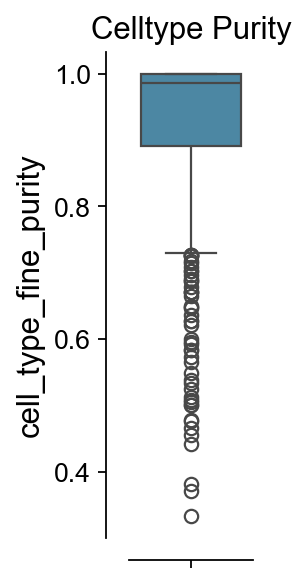

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(data=SEACell_purity, y='cell_type_fine_purity',ax=ax,
           color=ov.utils.blue_color[3])
plt.title('Celltype Purity')
sns.despine()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("figures/sea_Purity.png",dpi=300,bbox_inches = 'tight')
plt.savefig("figures/sea_Purity.pdf",dpi=300,bbox_inches = 'tight')


In [440]:
separation = meta_obj.separation(use_rep='X_pca',nth_nbr=1)
separation.head()

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


separation
SEACell                
SEACell-0      0.028246
SEACell-1      0.102992
SEACell-10     0.075360
SEACell-100    0.030973
SEACell-101    0.115363

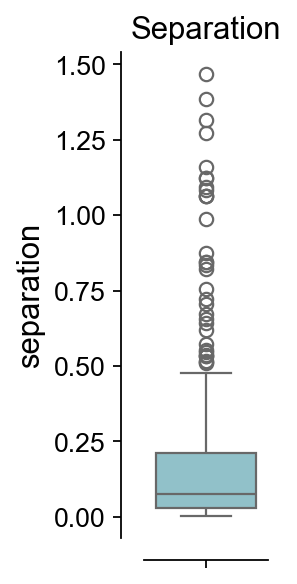

In [441]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(data=separation, y='separation',ax=ax,
           color=ov.utils.blue_color[4])
plt.title('Separation')
sns.despine()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("figures/sea_Separation.png",dpi=300,bbox_inches = 'tight')
plt.savefig("figures/sea_Separation.pdf",dpi=300,bbox_inches = 'tight')


In [442]:
compactness = meta_obj.compactness(use_rep='X_pca')
compactness.head()

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:05)


compactness
SEACell                 
SEACell-0       0.004396
SEACell-1       0.050003
SEACell-10      0.001876
SEACell-100     0.000938
SEACell-101     0.012314

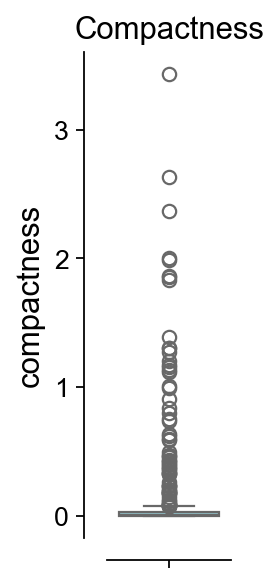

In [443]:
fig, ax = plt.subplots(figsize=(1,4))
sns.boxplot(data=compactness, y='compactness',ax=ax,
           color=ov.utils.blue_color[4])
plt.title('Compactness')
sns.despine()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.savefig("figures/sea_Compactness.png",dpi=300,bbox_inches = 'tight')
plt.savefig("figures/sea_Compactness.pdf",dpi=300,bbox_inches = 'tight')


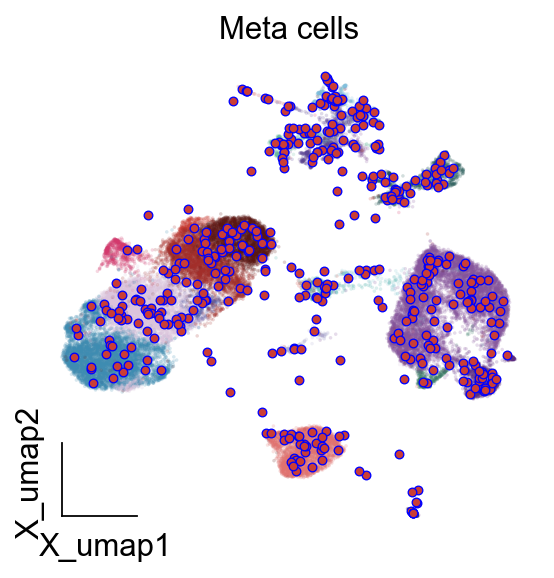

In [450]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(
    adata,
    basis="X_umap",
    color=['cell_type_fine'],
    frameon='small',
    title="Meta cells",
    legend_loc=None,
    #legend_fontsize=14,
    #legend_fontoutline=2,
    #legend=False,
    size=10,
    ax=ax,
    alpha=0.2,
    #legend_loc='', 
    add_outline=False, 
    #add_outline=True,
    outline_color='black',
    outline_width=1,
    show=False,
    #palette=ov.utils.blue_color[:],
    #legend_fontweight='normal'
)
ov.single._metacell.plot_metacells(ax,meta_obj.adata,color='#CB3E35',
                                  )
plt.savefig("figures/umap_metas.png",dpi=300,bbox_inches = 'tight')
plt.savefig("figures/umap_metas.pdf",dpi=300,bbox_inches = 'tight')


In [427]:
from scipy.sparse import csr_matrix

In [428]:
meta_obj.adata.layers['normlog']=csr_matrix(adata.X)

In [15]:
ad=meta_obj.predicted(method='soft',celltype_label='final_celltype_type',
                 summarize_layer='normlog')

100%|██████████| 447/447 [30:44<00:00,  4.13s/it]


In [17]:
ov.pp.scale(ad)
ov.pp.pca(ad,layer='scaled',n_pcs=50)
sc.pp.neighbors(ad, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [18]:
ad.obsm["X_mde"] = ov.utils.mde(ad.obsm["scaled|original|X_pca"])


In [19]:
sc.tl.umap(ad)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


In [23]:
ad.obs['celltype']=[i.replace('Class-switched B','Class_switched B') for i in ad.obs['celltype']]

In [24]:
ad.obs['ct']=[i.split('-')[0] for i in ad.obs['celltype']]
ad.obs['status']=[i.split('-')[1] for i in ad.obs['celltype']]

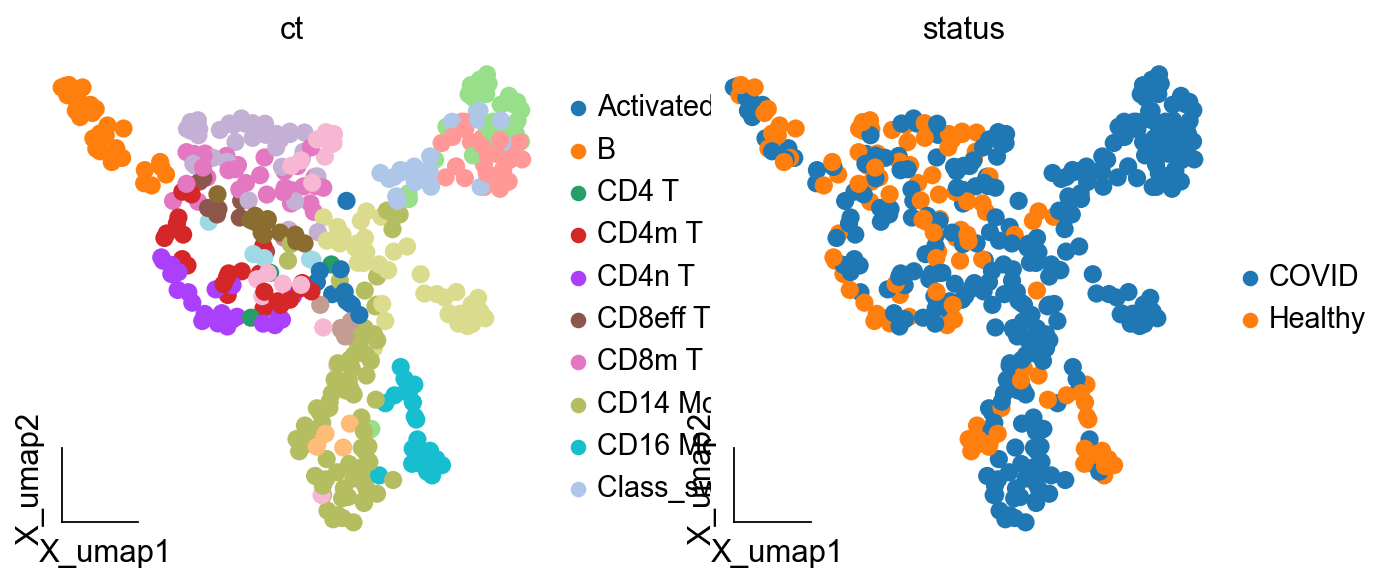

In [27]:
ov.utils.embedding(
    ad,
    basis="X_umap",
    color=["ct","status"],
    frameon='small',
    ncols=3,
    #palette=ov.utils.red_color[2:3]+ov.utils.green_color[2:]
)

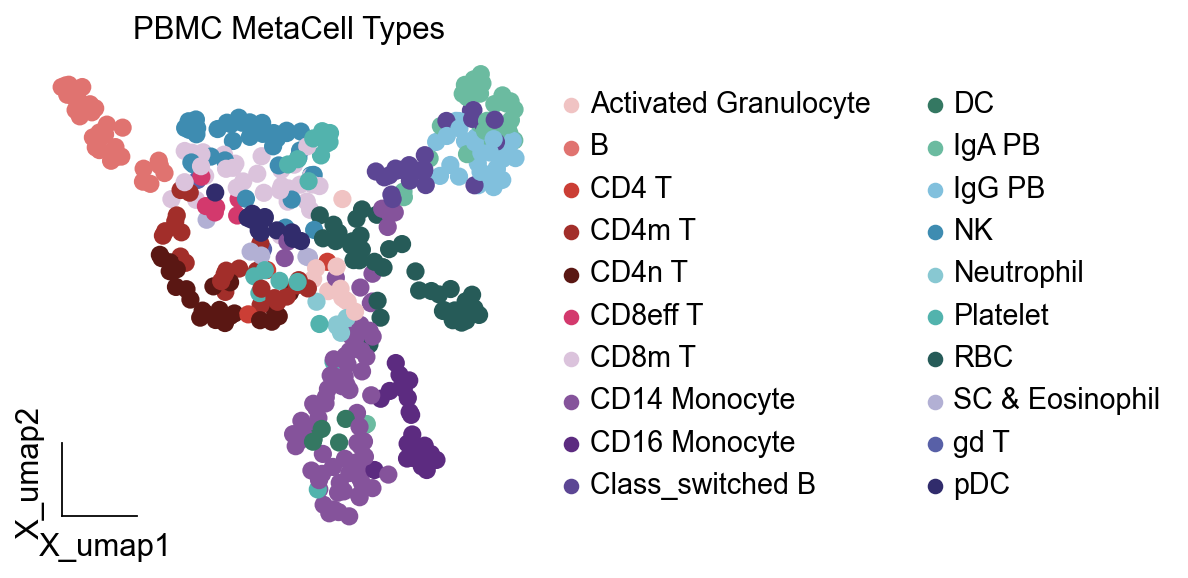

In [455]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(ad,
                  basis='X_umap',
                  color=['ct'],
                title='PBMC MetaCell Types',
                   show=False, add_outline=False, 
                palette=ov.pl.red_color+ov.pl.blue_color+ov.pl.green_color,
                   frameon='small',legend_fontoutline=2,ax=ax
                 )


plt.savefig('figures/umap_meta_celltype.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/umap_meta_celltype.pdf',dpi=300,bbox_inches='tight')


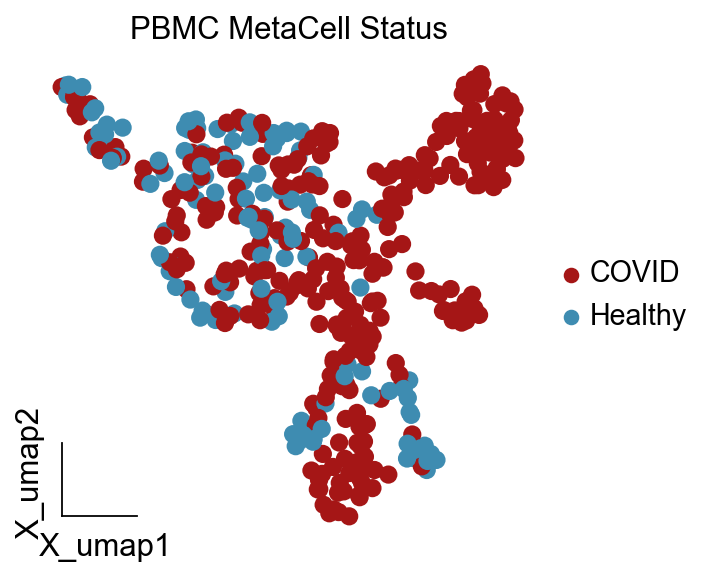

In [456]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(ad,
                  basis='X_umap',
                  color=['status'],
                title='PBMC MetaCell Status',
                   show=False, add_outline=False, 
                palette=['#a51616',ov.pl.blue_color[3]],
                   frameon='small',legend_fontoutline=2,ax=ax
                 )


plt.savefig('figures/umap_meta_status.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/umap_meta_status.pdf',dpi=300,bbox_inches='tight')


In [28]:
ad.write(f'result/covid_meta.h5ad',compression='gzip')

In [6]:
ad=ov.read(f'result/covid_meta.h5ad',compression='gzip')

In [3]:
herb=pd.read_csv('data/inte_target.tsv',sep='\t',index_col=0)
herb.head()

herb_id    herb_name       herb_type target  Resource
0  HBIN041751  quinic acid  Aliphatic acid    CA2  Lianqiao
1  HBIN041751  quinic acid  Aliphatic acid  PTGS2  Lianqiao
2  HBIN041751  quinic acid  Aliphatic acid  GRIA2  Lianqiao
3  HBIN041751  quinic acid  Aliphatic acid   ACHE  Lianqiao
4  HBIN041751  quinic acid  Aliphatic acid   DPP4  Lianqiao

In [4]:
herb_name_li=list(set(herb['herb_name']))
len(herb_name_li)

51

In [5]:
herb_target_dict={}
for name in herb_name_li:
    herb_target_dict[name]=herb.loc[herb['herb_name']==name,'target'].tolist()

In [32]:
##Assest all pathways
adata_aucs=ov.single.pathway_aucell_enrichment(ad,
                                                  pathways_dict=herb_target_dict,
                                                  num_workers=2)

ctxcore have been install version: 0.2.0


Less than 80% of the genes in isoquercitrin are present in the expression matrix.


In [33]:
adata_aucs.obs=ad[adata_aucs.obs.index].obs
adata_aucs.obsm=ad[adata_aucs.obs.index].obsm
adata_aucs.obsp=ad[adata_aucs.obs.index].obsp
adata_aucs

AnnData object with n_obs × n_vars = 447 × 51
    obs: 'Pseudo-sizes', 'celltype', 'celltype_purity', 'ct', 'status'
    obsm: 'scaled|original|X_pca', 'X_mde', 'X_umap'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_aucs.var

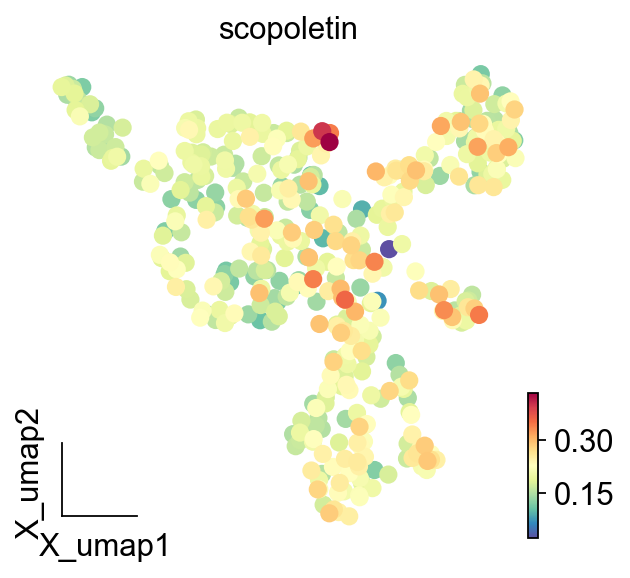

In [36]:
ov.utils.embedding(
    adata_aucs,
    basis="X_umap",
    color=["scopoletin"],
    frameon='small',
    ncols=3,
    #palette=ov.utils.red_color[2:3]+ov.utils.green_color[2:]
)

In [457]:
##Assest test geneset
ov.single.geneset_aucell(ad,
                            geneset_name='jinhua',
                            geneset=list(set(herb['target'])))

ctxcore have been install version: 0.2.0


In [466]:
len(degs)

620

In [458]:
##Assest test geneset
ov.single.geneset_aucell(ad,
                            geneset_name='jinhua_degs',
                            geneset=list(set(herb['target']) & set(degs)))

ctxcore have been install version: 0.2.0


In [ ]:
list(set(herb['target']) & set(degs))

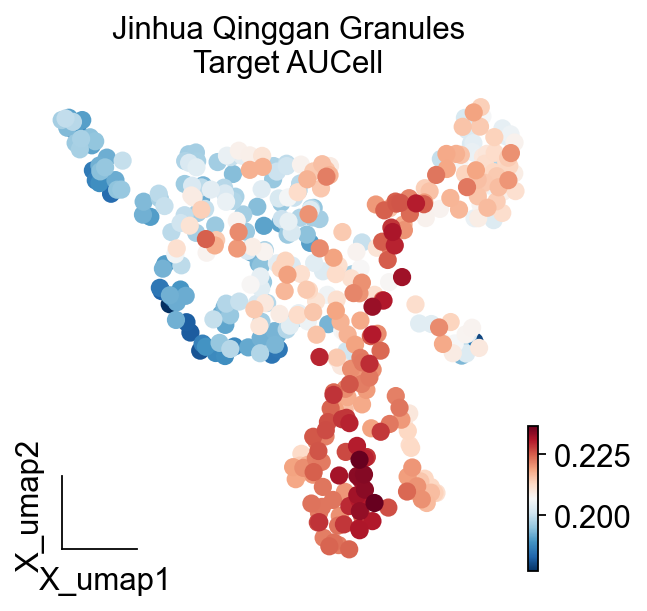

In [459]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(ad,
                  basis='X_umap',
                  color=['jinhua_aucell'],
                title='Jinhua Qinggan Granules\nTarget AUCell',
                   show=False, add_outline=False, cmap='RdBu_r',
                #palette=['#a51616',ov.pl.blue_color[3]],
                   frameon='small',legend_fontoutline=2,ax=ax
                 )


plt.savefig('figures/umap_meta_jinhua_aucell.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/umap_meta_jinhua_aucell.pdf',dpi=300,bbox_inches='tight')


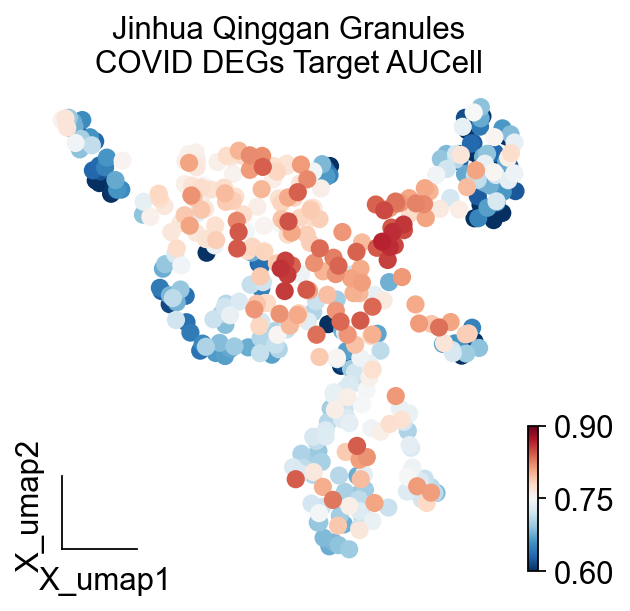

In [473]:
from matplotlib import patheffects
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4,4))

ov.pl.embedding(ad,
                  basis='X_umap',
                  color=['jinhua_degs_aucell'],
                title='Jinhua Qinggan Granules\nCOVID DEGs Target AUCell',
                   show=False, add_outline=False, cmap='RdBu_r',
                #palette=['#a51616',ov.pl.blue_color[3]],
                   frameon='small',legend_fontoutline=2,ax=ax,
                vmin=0.6,vmax=0.9,
                 )


plt.savefig('figures/umap_meta_jinhua_degs_aucell.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/umap_meta_jinhua_degs_aucell.pdf',dpi=300,bbox_inches='tight')


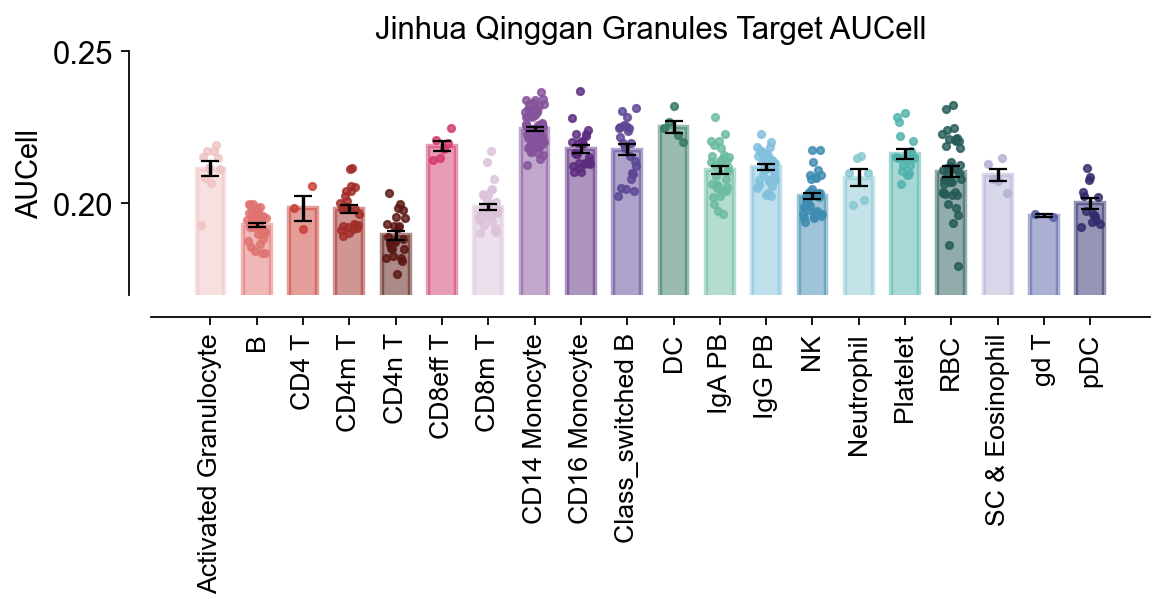

In [472]:
fig, ax = plt.subplots(figsize=(8,2))
ov.pl.bardotplot(ad,groupby='ct',color='jinhua_aucell',figsize=(6,2),
           ax=ax,
          ylabel='jinhua_aucell',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
plt.ylim(0.17,0.25)
plt.title('Jinhua Qinggan Granules Target AUCell')
plt.ylabel('AUCell')
plt.savefig('figures/bardotplot_jinhua_aucell.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/bardotplot_jinhua_aucell.pdf',dpi=300,bbox_inches='tight')


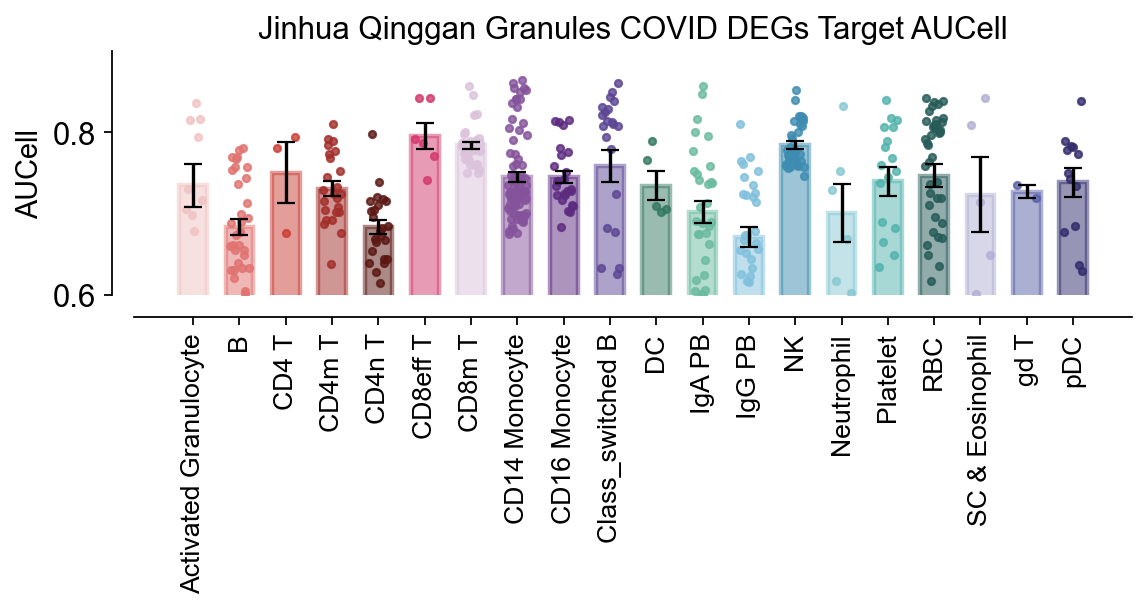

In [471]:
fig, ax = plt.subplots(figsize=(8,2))
ov.pl.bardotplot(ad,groupby='ct',color='jinhua_degs_aucell',figsize=(6,2),
           ax=ax,
          ylabel='jinhua_aucell',
           bar_kwargs={'alpha':0.5,'linewidth':2,'width':0.6,'capsize':4},
           scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'})
plt.ylim(0.6,0.9)
plt.title('Jinhua Qinggan Granules COVID DEGs Target AUCell')
plt.ylabel('AUCell')
plt.savefig('figures/bardotplot_jinhua_degs_aucell.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/bardotplot_jinhua_degs_aucell.pdf',dpi=300,bbox_inches='tight')


In [199]:
ad.X.min()

0.0

In [12]:
test_adata=ad
dds_meta=ov.bulk.pyDEG(test_adata.to_df().T)
dds_meta.drop_duplicates_index()
print('... drop_duplicates_index success')

treatment_groups=test_adata.obs[test_adata.obs['status']=='COVID'].index.tolist()
control_groups=test_adata.obs[test_adata.obs['status']=='Healthy'].index.tolist()
result=dds_meta.deg_analysis(treatment_groups,control_groups,method='ttest')

... drop_duplicates_index success


In [13]:
dds_meta.result['BaseMean'].min()

5.494063309932734e-05

In [14]:
print(dds_meta.result.shape)
dds_meta.result=dds_meta.result.loc[dds_meta.result['BaseMean']>0.1]
print(dds_meta.result.shape)

(26361, 11)
(2117, 11)


In [15]:
# -1 means automatically calculates
dds_meta.foldchange_set(fc_threshold=0.5,
                   pval_threshold=0.05,
                   logp_max=20)

... Fold change threshold: 0.5


In [16]:
degs=dds_meta.result.loc[dds_meta.result['sig']!='normal'].index.tolist()
len(degs)

620

In [ ]:
dds_meta.result.sort_values('BaseMean')

In [ ]:
degree_dict_pd=pd.DataFrame()
degree_dict_pd['node']=degree_dict.keys()
degree_dict_pd.index=degree_dict_pd['node']
degree_dict_pd['degree']=degree_dict.values()
degree_dict_pd=degree_dict_pd.sort_values('degree',ascending=False)

In [ ]:
degree_dict_pd.loc[list(set(herb['target']) & set(degs))].sort_values('degree',ascending=False)

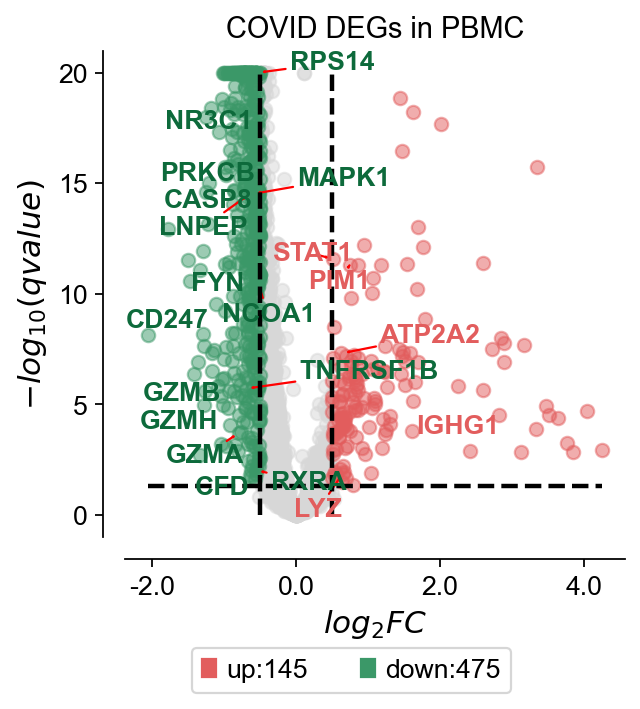

In [360]:
fig,ax=dds_meta.plot_volcano(title='DEG Analysis',figsize=(4,4),
                 plot_genes=degree_dict_pd.loc[list(set(herb['target']) & set(degs))].sort_values('degree',ascending=False)['node'].tolist()[:20],
                             plot_genes_fontsize=12,
                             down_color='#3b9868',down_fontcolor='#0d6a3b')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('COVID DEGs in PBMC',fontsize=13)

plt.savefig('figures/degs_covid.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/degs_covid.pdf',dpi=300,bbox_inches='tight')


In [7]:
import networkx as nx
G = nx.Graph()
herb_jvhua=herb
for i in herb_jvhua.index:
    G.add_edge(herb_jvhua.loc[i,'herb_id'],herb_jvhua.loc[i,'target'])

In [9]:
ct_num=dict(zip(ad.obs['ct'].cat.categories,range(len(ad.obs['ct'].cat.categories))))

In [50]:
p=dict(G.nodes)
for i in p.keys():
    p[i]=-1
    for j in marker_dict.keys():
        if i in marker_dict[j]:
            p[i]=ct_num[j]
for i in p.keys():
    

In [10]:

d = dict(G.degree)
p=dict(G.nodes)


In [46]:
from matplotlib.colors import LinearSegmentedColormap
#age_color=
myColors = ((0.8, 0.0, 0.0, 1.0), (0.0, 0.8, 0.0, 1.0), (0.0, 0.0, 0.8, 1.0))
#cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
colors=['#c2c2c2']+list(ad.uns['ct_colors'])
c = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

In [20]:
color_dict=dict(zip(ad.obs['ct'].cat.categories,ad.uns['ct_colors']))
color_dict['herb']='#3b9868'
color_dict['other']='#c2c2c2'

In [98]:
color_li=[]

for i in p.keys():
    if i in all_target:
        for j in marker_dict.keys():
            if i in marker_dict[j]:
                color_li.append('#a51616')
                #color_li.append(color_dict[j])
                break
    elif i in herb['herb_id'].tolist():
        color_li.append(color_dict['herb'])
        #print(i)
    else:
        color_li.append(color_dict['other'])
        
            

In [21]:
color_li=[]

for i in p.keys():
    if i in degs:
        color_li.append('#a51616')
    elif i in herb['herb_id'].tolist():
        color_li.append(color_dict['herb'])
        #print(i)
    else:
        color_li.append(color_dict['other'])
        
            

In [ ]:
degree_dict_sub={}
for i in herb['herb_id'].tolist():
    if degree_dict[i]>50:
        degree_dict_sub[i]=degree_dict[i]

In [23]:
newjinhua=pd.read_csv('data/herb_jinhua.csv',index_col=0)
newjinhua.head()

R.T. min       Classification                 Name    Formula  \
herb_id                                                                     
HBIN023529      0.49                Sugar      D-Gluconic acid    C6H12O7   
HBIN041751      0.52       Aliphatic acid          quinic acid    C7H12O6   
HBIN022650      1.33  Phenolic acid ester            Danshensu    C9H10O5   
HBIN044342      1.47             Alkaloid         sophocarpine  C15H22N2O   
HBIN040908      1.60        Phenolic acid  protocatechuic acid     C7H6O4   

              M.W.             Molecular ion peak and fragment (m/z )  \
herb_id                                                                 
HBIN023529     NaN  195.0503, 177.0395, 159.0290, 129.0183, 99.007...   
HBIN041751  192.17  191.0552, 173.0446, 155.0340, 127.0390, 109.02...   
HBIN022650  198.17  197.0453, 179.0343, 135.0442, 123.0442, 109.02...   
HBIN044342  246.35  247.1802, 245.1647, 229.1693, 186.1151, 179.15...   
HBIN040908  154.12  154.0220, 153.0185, 110.0317, 109.0285, 108.02...   

            Resource Anti-Covid-19 potential   herb_id.1        Ingredient_id  \
herb_id                                                                         
HBIN023529       NaN                     NaN  HBIN023529      d-gluconic acid   
HBIN041751       NaN                     NaN  HBIN041751          quinic acid   
HBIN022650       NaN                    [34]  HBIN022650            danshensu   
HBIN044342       NaN                    [35]  HBIN044342         sophocarpine   
HBIN040908       NaN                     NaN  HBIN040908  protocatechuic acid   

                                                  herb_target  
herb_id                                                        
HBIN023529                                                 []  
HBIN041751          ['CA2', 'PTGS2', 'GRIA2', 'ACHE', 'DPP4']  
HBIN022650  ['ADRA2C', 'COL3A1', 'ADRB1', 'TIMP1', 'PTGS1'...  
HBIN044342  ['AKT1', 'CTNNB1', 'IL6', 'ITK', 'GSK3B', 'TGF...  
HBIN040908  ['NFKB1', 'PTGS1', 'IL1B', 'DPEP1', 'CASP9', '...

In [24]:
newjinhua.loc['HBIN044342','Name']

'sophocarpine'

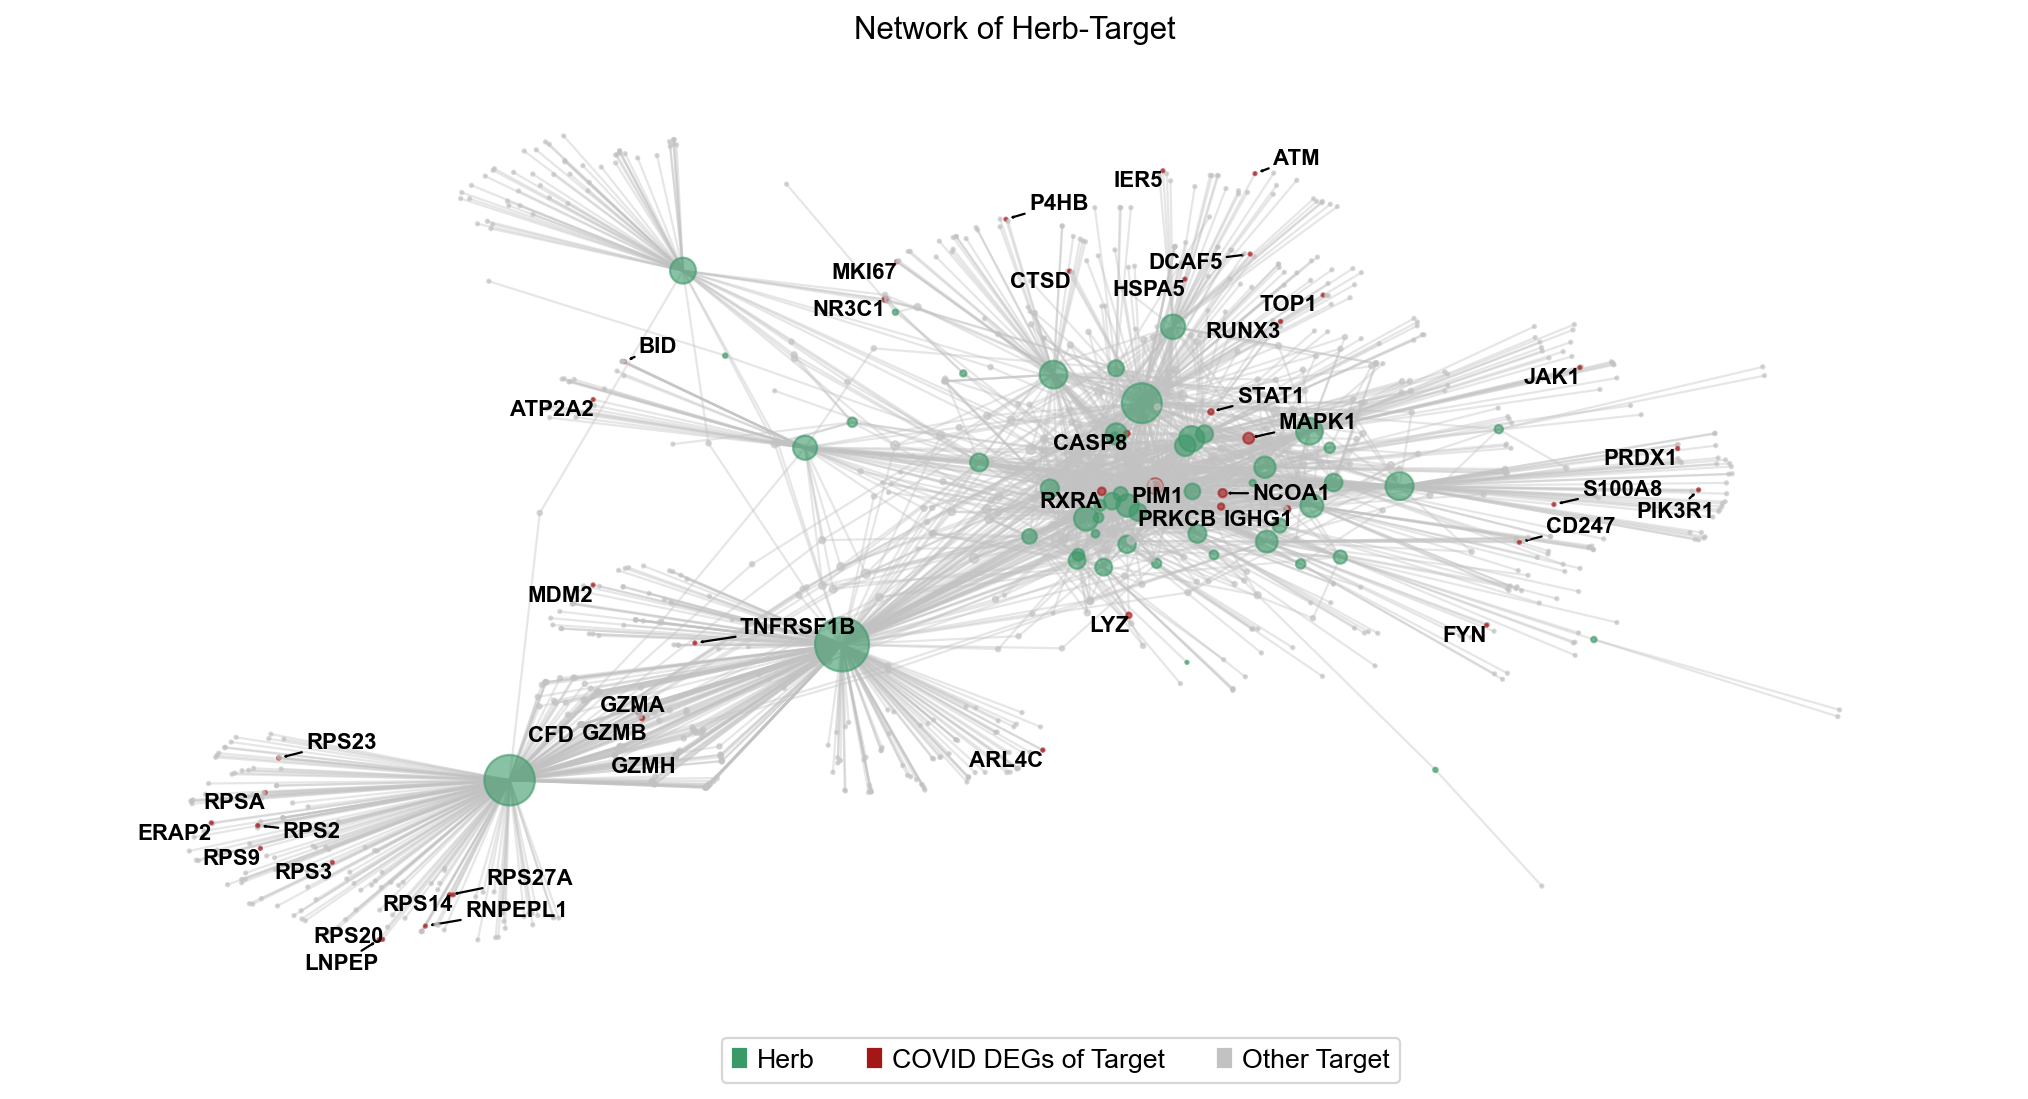

In [28]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(16,8))
pos = nx.spring_layout(G, scale=0.5, k=0.01)
#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G, pos, nodelist=list(p.keys()), alpha=0.4,edge_color='#c2c2c2')
degree_dict = dict(G.degree(G.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=[degree_dict[v]*2 for v in G],
    node_color=color_li,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(set(herb['target']) & set(degs))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


pos1=dict()
for i in degree_dict_sub.keys():
    pos1[i]=pos[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           newjinhua.loc[i,'Name'],
           fontdict={'size':10,'weight':'bold','color':'#0d6a3b'}
           ) for i in degree_dict_sub.keys() if 'ENSG' not in i]
#adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
#                    arrowprops=dict(arrowstyle='->', color='black'))


ax.axis("off")

labels = ['Herb','COVID DEGs of Target','Other Target']
labels_color=[color_dict['herb'],'#a51616',color_dict['other']]
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend

patches = [ mpatches.Patch(color=labels_color[i], label="{:s}".format(labels[i]) ) for i in range(len(labels)) ] 
plt.title('Network of Herb-Target',fontsize=14)
#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.legend(handles=patches,bbox_to_anchor=(0.7, 0), ncol=3,fontsize=12)

#plt.savefig('figures/network_tcm.png',dpi=300,bbox_inches='tight')
#plt.savefig('figures/network_tcm.pdf',dpi=300,bbox_inches='tight')


In [112]:
herb.head()

herb_id    herb_name       herb_type target  Resource
0  HBIN041751  quinic acid  Aliphatic acid    CA2  Lianqiao
1  HBIN041751  quinic acid  Aliphatic acid  PTGS2  Lianqiao
2  HBIN041751  quinic acid  Aliphatic acid  GRIA2  Lianqiao
3  HBIN041751  quinic acid  Aliphatic acid   ACHE  Lianqiao
4  HBIN041751  quinic acid  Aliphatic acid   DPP4  Lianqiao

In [172]:
herb.loc[herb['herb_id']=='HBIN041751','Resource'].iloc[0]

'Lianqiao'

In [167]:
i

'HBIN023529'

In [174]:
newjinhua['Resource']=''
for i in newjinhua.index:
    if i in herb['herb_id'].tolist():
        newjinhua.loc[i,'Resource']=herb.loc[herb['herb_id']==i,'Resource'].iloc[0]
    else:
        newjinhua.loc[i,'Resource']='Mixed'

In [373]:
class_dict={}
c_dict=dict(newjinhua['Classification'].value_counts())
for i in c_dict.keys():
    if c_dict[i]>=2:
        class_dict[i]=c_dict[i]
    else:
        if 'Others' not in class_dict.keys():
            class_dict['Others']=c_dict[i]
        else:
            class_dict['Others']+=c_dict[i]
class_dict

{'Flavonoid': 29,
 'Caffeoylquinic acid': 6,
 'Phenolic acid': 5,
 'Alkaloid': 4,
 'Coumarin': 3,
 'Saponin': 3,
 'Xanthone': 2,
 'Lignin': 2,
 'Phenanthra quinone': 2,
 'Phenylpropanoid': 2,
 'Anthraquinone': 2,
 'Others': 10}

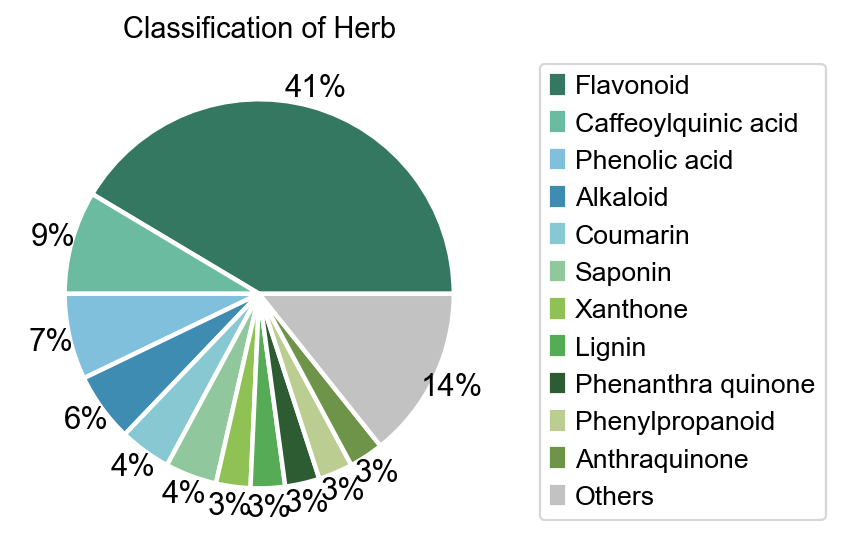

In [379]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(4,4))
color = ov.pl.blue_color[:5]+ov.pl.green_color[:6]+['#c2c2c2']
#color=sc.pl.palettes.zeileis_28[:]
ax.pie(class_dict.values(), #labels=class_dict.keys(), #labeldistance=1.15, 
        autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.5,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        colors=color);

labels = list(class_dict.keys())
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend

patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(labels)) ] 
plt.title('Classification of Herb',fontsize=13)
#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.legend(handles=patches,bbox_to_anchor=(1.05, 1), ncol=1,fontsize=12)

plt.savefig('figures/pie_class_herb.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/pie_class_herb.pdf',dpi=300,bbox_inches='tight')


In [365]:
class_dict={}
class_dict_pd=pd.DataFrame()
#c_dict=dict(newjinhua['Resource'].value_counts())
for i in list(set(herb['Resource'].tolist())):
    class_dict[i]=len(list(set(herb.loc[herb['Resource']==i,'herb_id'])))
class_dict_pd['Resource']=class_dict.keys()
class_dict_pd['Number']=class_dict.values()
class_dict_pd=class_dict_pd.sort_values('Number',ascending=False)

In [366]:
class_dict_pd.head()

Resource  Number
5    Lianqiao      16
9    Huangqin      13
12      Mixed      13
1   Jinyinhua      12
3     Mahuang      12

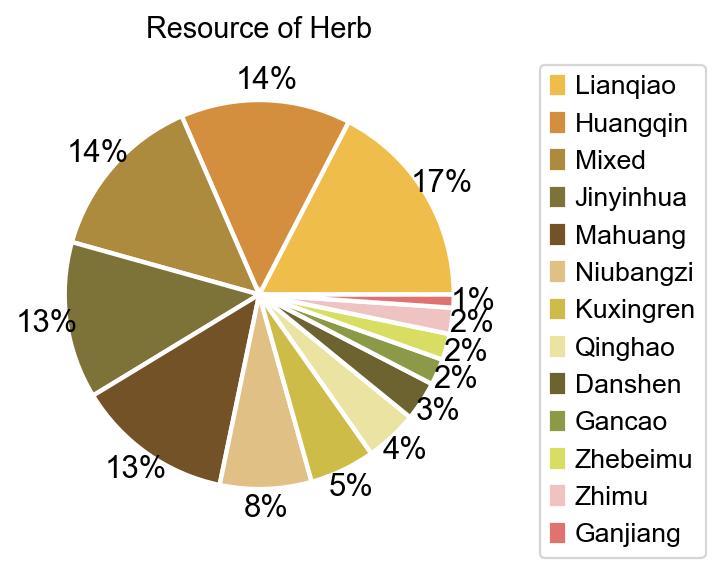

In [367]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(4,4))
color = ov.pl.orange_color[:]+ov.pl.red_color[:]
color_dict=dict(zip(class_dict_pd['Resource'],color))
#color=sc.pl.palettes.zeileis_28[:]
ax.pie(class_dict_pd['Number'], #labels=class_dict.keys(), #labeldistance=1.15, 
        autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        colors=color);

labels = list(class_dict_pd['Resource'])
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend

patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(labels)) ] 
plt.title('Resource of Herb',fontsize=13)
#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.legend(handles=patches,bbox_to_anchor=(1.05, 1), ncol=1,fontsize=12)

plt.savefig('figures/pie_resource_herb.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/pie_resource_herb.pdf',dpi=300,bbox_inches='tight')


In [192]:
degs=dds_meta.result.loc[dds_meta.result['sig']!='normal'].index.tolist()

In [246]:
herb.head()

herb_id    herb_name       herb_type target  Resource
0  HBIN041751  quinic acid  Aliphatic acid    CA2  Lianqiao
1  HBIN041751  quinic acid  Aliphatic acid  PTGS2  Lianqiao
2  HBIN041751  quinic acid  Aliphatic acid  GRIA2  Lianqiao
3  HBIN041751  quinic acid  Aliphatic acid   ACHE  Lianqiao
4  HBIN041751  quinic acid  Aliphatic acid   DPP4  Lianqiao

In [325]:
type_dict={}
for i in list(set(herb['Resource'])):
    all_p=herb.loc[herb['Resource']==i,'target'].tolist()
    covid_p=list(set(all_p) & set(degs))
    type_dict[i]=len(covid_p)/len(all_p)
type_dict

{'Gancao': 0.01694915254237288,
 'Jinyinhua': 0.03783783783783784,
 'Zhebeimu': 0.06666666666666667,
 'Mahuang': 0.041033434650455926,
 'Zhimu': 0.07692307692307693,
 'Lianqiao': 0.027065527065527065,
 'Niubangzi': 0.047619047619047616,
 'Ganjiang': 0.03389830508474576,
 'Qinghao': 0.05263157894736842,
 'Huangqin': 0.026917900403768506,
 'Kuxingren': 0.047619047619047616,
 'Danshen': 0.02158273381294964,
 'Mixed': 0.027079303675048357}

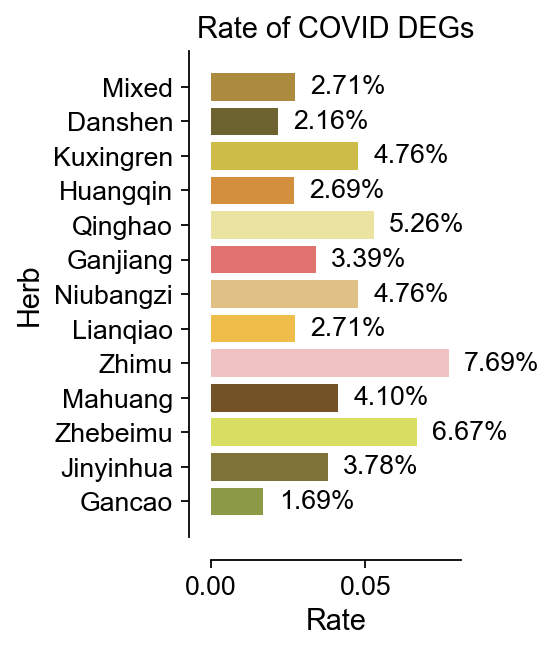

In [368]:
fig, ax = plt.subplots(figsize=(2,4))
ax.barh(y=list(type_dict.keys()),
     width=list(type_dict.values()),
       color=[color_dict[i] for i in type_dict.keys()])
for idx,i in enumerate(list(type_dict.keys())):
    ax.text(type_dict[i]+0.005,idx,'{:.2f}%'.format(type_dict[i]*100),
            fontsize=12,verticalalignment='center')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Rate',fontsize=12+1)
plt.ylabel('Herb',fontsize=12+1)
plt.title('Rate of COVID DEGs',fontsize=12+1)

plt.savefig('figures/bar_resource_herb.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/bar_resource_herb.pdf',dpi=300,bbox_inches='tight')


In [382]:
type_dict={}
for i in list(set(herb['herb_name'])):
    all_p=herb.loc[herb['herb_name']==i,'target'].tolist()
    covid_p=list(set(all_p) & set(degs))
    type_dict[i]=len(covid_p)/len(all_p)
type_dict

{'rutin': 0.012903225806451613,
 'astragalin': 0.016666666666666666,
 'naringenin': 0.018867924528301886,
 'sophocarpine': 0.0,
 'isochlorogenic acid c': 0.0,
 'isoliquiritigenin': 0.021739130434782608,
 'tanshinone iia': 0.058823529411764705,
 'salidroside': 0.010869565217391304,
 'danshensu': 0.0,
 'liquiritin': 0.07692307692307693,
 'sophoricoside': 0.16666666666666666,
 'mangiferin': 0.0,
 'rosmarinic acid': 0.10416666666666667,
 'vitexin': 0.05555555555555555,
 'protocatechuic acid': 0.03225806451612903,
 'esculetin': 0.06666666666666667,
 'pectolinarigenin': 0.1,
 'scutellarin': 0.1111111111111111,
 'chlorogenic acid': 0.0,
 'wogonin': 0.015202702702702704,
 '6-gingerol': 0.03389830508474576,
 'diosgenin': 0.07692307692307693,
 'forsythoside b': 0.0,
 'peimisine': 0.25,
 'quinic acid': 0.0,
 'diosmin': 0.08,
 'scutellarein': 0.05,
 'acteoside': 0.0,
 'vanillic acid': 0.03571428571428571,
 'caffeic acid': 0.011494252873563218,
 'chrysin': 0.023255813953488372,
 'cryptotanshinone':

In [384]:
type_dict_pd=pd.DataFrame()
type_dict_pd['name']=type_dict.keys()
type_dict_pd['value']=type_dict.values()
type_dict_pd=type_dict_pd.sort_values('value',ascending=False)
type_dict_pd.head()

name     value
23        peimisine  0.250000
10    sophoricoside  0.166667
17      scutellarin  0.111111
47         irigenin  0.107143
12  rosmarinic acid  0.104167

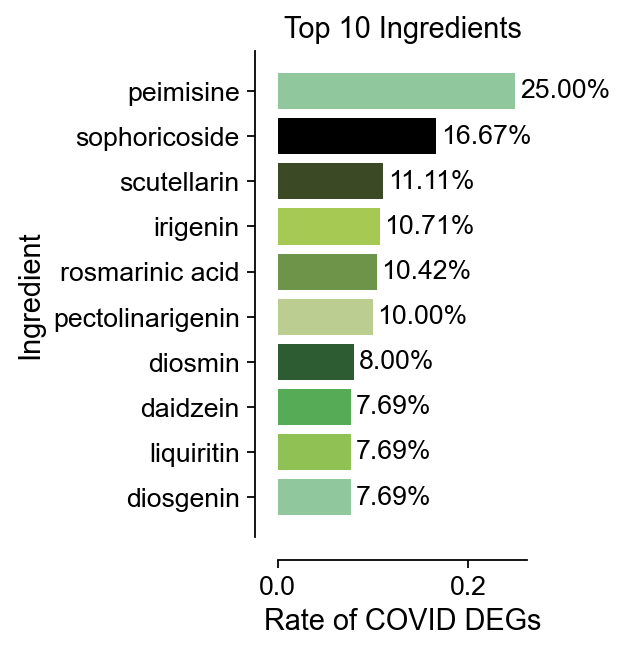

In [395]:
fig, ax = plt.subplots(figsize=(2,4))
ax.barh(y=list(type_dict_pd.iloc[:10].sort_values('value')['name'].tolist()),
     width=list(type_dict_pd.iloc[:10].sort_values('value')['value'].tolist()),
       color=ov.pl.green_color
       )
for idx,i in enumerate(list(type_dict_pd.iloc[:10].sort_values('value')['name'].tolist())):
    ax.text(type_dict[i]+0.005,idx,'{:.2f}%'.format(type_dict[i]*100),
            fontsize=12,verticalalignment='center')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Rate of COVID DEGs',fontsize=12+1)
plt.ylabel('Ingredient',fontsize=12+1)
plt.title('Top 10 Ingredients',fontsize=12+1)

plt.savefig('figures/bar_Ingredient_herb.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/bar_Ingredient_herb.pdf',dpi=300,bbox_inches='tight')


In [396]:
type_dict={}
for i in list(set(herb['herb_name'])):
    all_p=herb.loc[herb['herb_name']==i,'target'].tolist()
    covid_p=list(set(all_p) & set(degs))
    type_dict[i]=len(covid_p)
type_dict

{'rutin': 2,
 'astragalin': 1,
 'naringenin': 1,
 'sophocarpine': 0,
 'isochlorogenic acid c': 0,
 'isoliquiritigenin': 1,
 'tanshinone iia': 3,
 'salidroside': 1,
 'danshensu': 0,
 'liquiritin': 1,
 'sophoricoside': 1,
 'mangiferin': 0,
 'rosmarinic acid': 5,
 'vitexin': 1,
 'protocatechuic acid': 3,
 'esculetin': 2,
 'pectolinarigenin': 3,
 'scutellarin': 2,
 'chlorogenic acid': 0,
 'wogonin': 9,
 '6-gingerol': 2,
 'diosgenin': 2,
 'forsythoside b': 0,
 'peimisine': 1,
 'quinic acid': 0,
 'diosmin': 2,
 'scutellarein': 1,
 'acteoside': 0,
 'vanillic acid': 1,
 'caffeic acid': 2,
 'chrysin': 2,
 'cryptotanshinone': 2,
 'formononetin': 2,
 'l-tryptophan': 15,
 'calycosin': 5,
 'caffeine': 4,
 'ethyl caffeate': 0,
 'daidzein': 6,
 'scoparone': 1,
 '18beta-glycyrrhetinic acid': 1,
 'quercetin': 10,
 'neochlorogenic acid': 0,
 '3,4-dicaffeoylquinic acid': 0,
 'baicalein': 4,
 'emodin': 4,
 'rhein': 1,
 'isoquercitrin': 0,
 'irigenin': 3,
 'luteoloside': 0,
 'ferulic acid': 0,
 'scopoletin

In [397]:
type_dict_pd=pd.DataFrame()
type_dict_pd['name']=type_dict.keys()
type_dict_pd['value']=type_dict.values()
type_dict_pd=type_dict_pd.sort_values('value',ascending=False)
type_dict_pd.head()

name  value
33  l-tryptophan     15
40     quercetin     10
19       wogonin      9
37      daidzein      6
34     calycosin      5

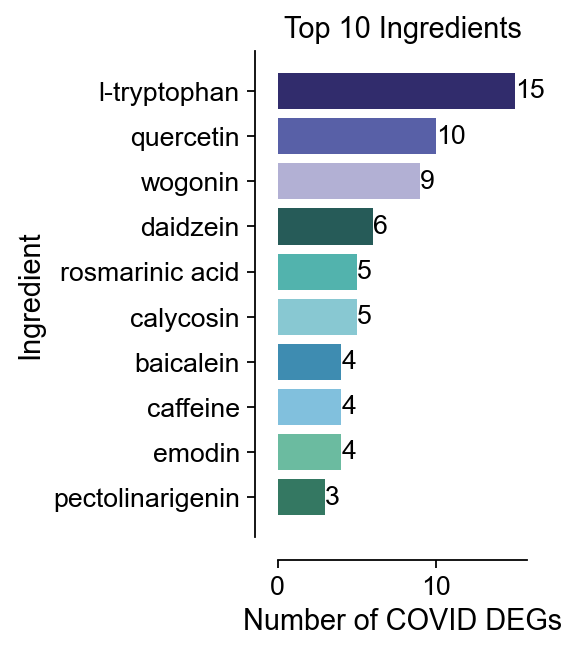

In [400]:
fig, ax = plt.subplots(figsize=(2,4))
ax.barh(y=list(type_dict_pd.iloc[:10].sort_values('value')['name'].tolist()),
     width=list(type_dict_pd.iloc[:10].sort_values('value')['value'].tolist()),
       color=ov.pl.blue_color
       )
for idx,i in enumerate(list(type_dict_pd.iloc[:10].sort_values('value')['name'].tolist())):
    ax.text(type_dict[i]+0.005,idx,'{:.0f}'.format(type_dict[i]),
            fontsize=12,verticalalignment='center')
plt.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Number of COVID DEGs',fontsize=12+1)
plt.ylabel('Ingredient',fontsize=12+1)
plt.title('Top 10 Ingredients',fontsize=12+1)

plt.savefig('figures/bar_Ingredient_herb_num.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/bar_Ingredient_herb_num.pdf',dpi=300,bbox_inches='tight')


In [32]:
marker_dict=ov.single.get_celltype_marker(ad,clustertype='ct')
marker_dict.keys()

...get cell type marker
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


dict_keys(['Activated Granulocyte', 'B', 'CD14 Monocyte', 'CD16 Monocyte', 'CD4 T', 'CD4m T', 'CD4n T', 'CD8eff T', 'CD8m T', 'Class_switched B', 'DC', 'IgA PB', 'IgG PB', 'NK', 'Neutrophil', 'Platelet', 'RBC', 'SC & Eosinophil', 'gd T', 'pDC'])

In [ ]:
marker_dict

In [ ]:
marker_dict_pd=pd.DataFrame()
marker_dict_pd['name']=marker_dict.keys()
marker_dict_pd['value']=len(marker_dict.values())
marker_dict_pd=marker_dict_pd.sort_values('value',ascending=False)
marker_dict_pd

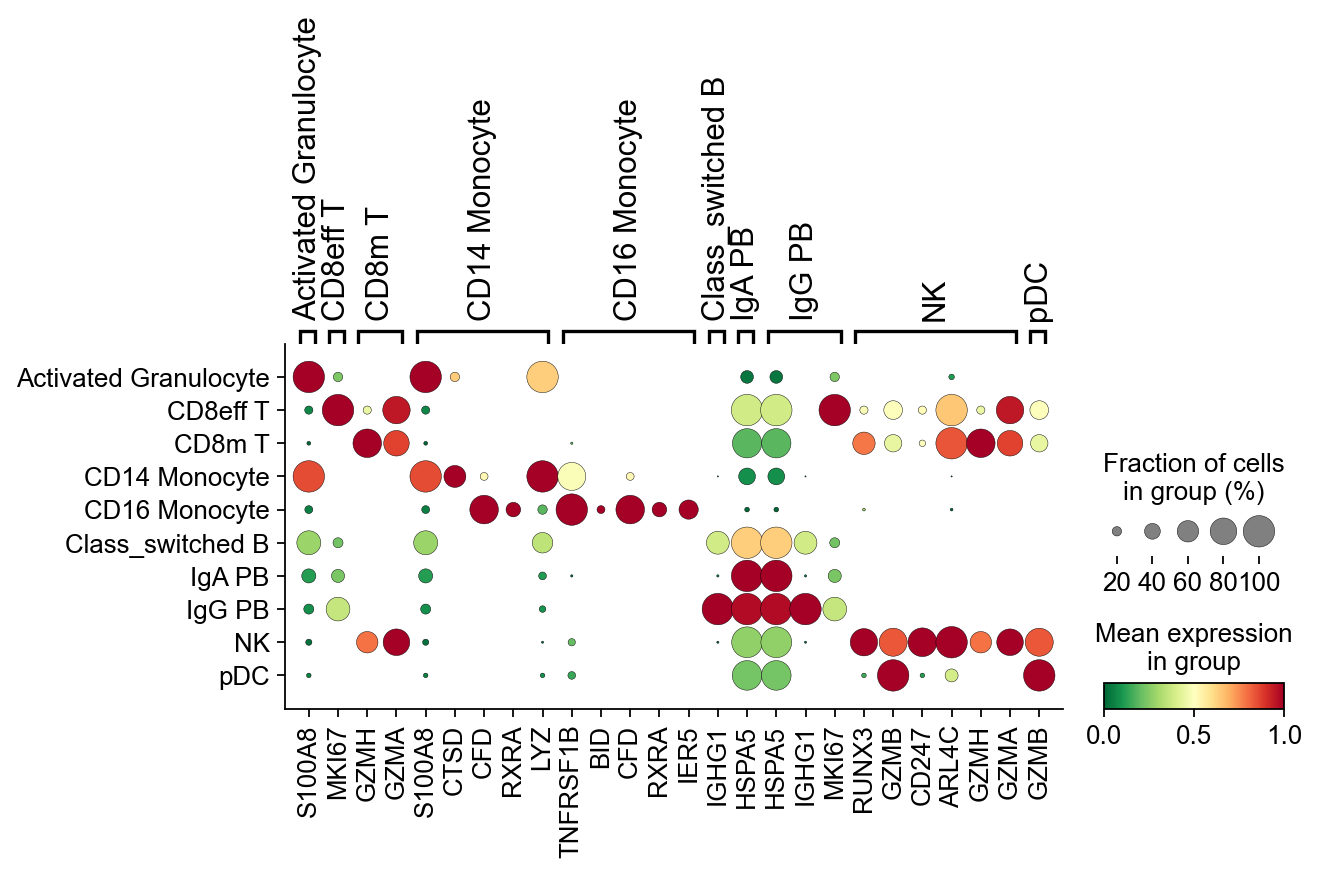

In [530]:
sc.pl.dotplot(ad[ad.obs['ct'].isin(ct_dict1.keys())],ct_dict1,groupby='ct',
             standard_scale='var',cmap='RdYlGn_r',expression_cutoff=0.5,figsize=(8,3),
             show=False)
plt.savefig('figures/dotplot_marker_herb.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/dotplot_marker_herb.pdf',dpi=300,bbox_inches='tight')


In [33]:
all_target=[]
ct_dict1={}
for i in ad.obs['ct'].cat.categories:
    print(i,list(set(marker_dict[i]) & set(herb['target']) & \
                     set(dds_meta.result.loc[dds_meta.result['sig']!='normal'].index)))
    all_target+=list(set(marker_dict[i]) & set(herb['target']) & \
                     set(dds_meta.result.loc[dds_meta.result['sig']!='normal'].index))
    ct1=list(set(marker_dict[i]) & set(herb['target']) & \
                     set(dds_meta.result.loc[dds_meta.result['sig']!='normal'].index))
    if len(ct1)!=0:
        ct_dict1[i]=ct1

Activated Granulocyte ['S100A8']
B []
CD4 T []
CD4m T []
CD4n T []
CD8eff T ['MKI67']
CD8m T ['GZMH', 'GZMA']
CD14 Monocyte ['CFD', 'LYZ', 'RXRA', 'S100A8', 'CTSD']
CD16 Monocyte ['CFD', 'RXRA', 'BID', 'TNFRSF1B', 'IER5']
Class_switched B ['IGHG1']
DC []
IgA PB ['HSPA5']
IgG PB ['MKI67', 'HSPA5', 'IGHG1']
NK ['ARL4C', 'GZMB', 'CD247', 'GZMH', 'RUNX3', 'GZMA']
Neutrophil []
Platelet []
RBC []
SC & Eosinophil []
gd T []
pDC ['GZMB']


In [30]:
import networkx as nx
G1 = nx.Graph()
herb_jvhua=herb
for i in herb_jvhua.index:
    if herb_jvhua.loc[i,'target'] in all_target:
        G1.add_edge(herb_jvhua.loc[i,'herb_id'],herb_jvhua.loc[i,'target'])
        
for i in marker_dict.keys():
    targets=list(set(marker_dict[i]) & set(herb['target']) & \
                     set(dds_meta.result.loc[dds_meta.result['sig']!='normal'].index))
    if len(targets)!=0:
        for t in targets:
            G1.add_edge(t,i)

NameError: name 'all_target' is not defined

In [484]:
ct_color_dict=dict(zip(ad.obs['ct'].cat.categories,ad.uns['ct_colors']))

In [487]:
color_li1=[]
for i in G1.nodes:
    if i in all_target:
        color_li1.append('#c2c2c2')
    elif i in marker_dict.keys():
        color_li1.append(ct_color_dict[i])
    else:
        color_li1.append('#3b9868')

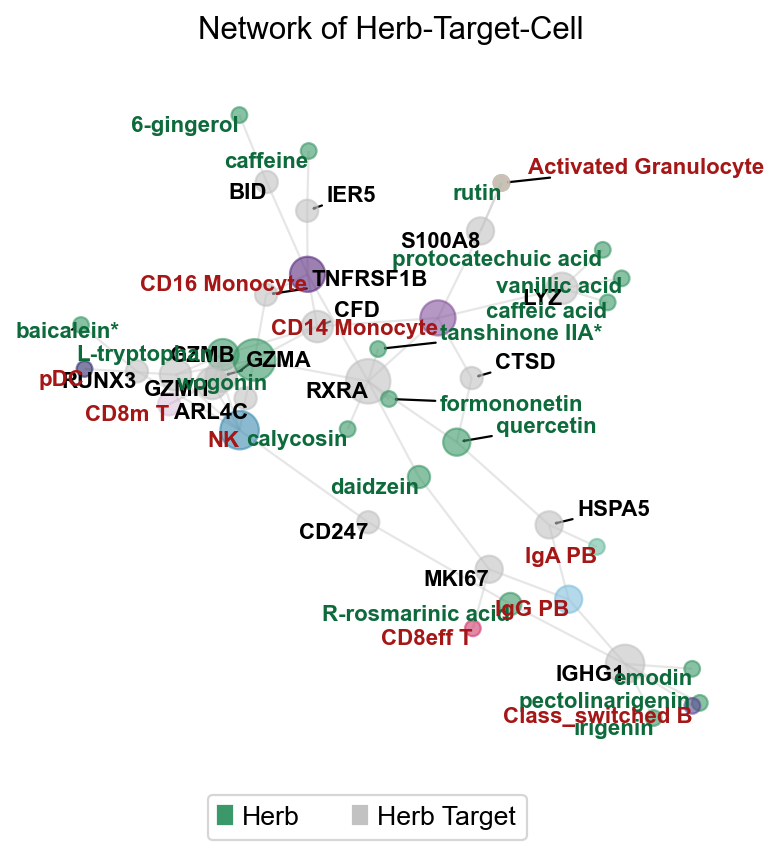

In [532]:
fig, ax = plt.subplots(figsize=(6,6))
pos2 = nx.spring_layout(G1, scale=0.5, k=0.01)
#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G1, pos2, nodelist=list(G1.nodes), alpha=0.4,edge_color='#c2c2c2')
degree_dict1 = dict(G1.degree(G1.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G1,
    pos2,
    nodelist=list(G1.nodes),
    node_size=[degree_dict1[v]*50 for v in G1],
    node_color=color_li1,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(set(G1.nodes) & set(all_target))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos2[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


hub_gene=list(set(G1.nodes) & set(herb['herb_id']))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos2[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           newjinhua.loc[i,'Name'],
           fontdict={'size':10,'weight':'bold','color':'#0d6a3b'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


hub_gene=list(set(G1.nodes) & set(marker_dict.keys()))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos2[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'#a51616'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


ax.axis("off")

labels = ['Herb','Herb Target']
labels_color=['#3b9868','#c2c2c2']
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend

patches = [ mpatches.Patch(color=labels_color[i], label="{:s}".format(labels[i]) ) for i in range(len(labels)) ] 
plt.title('Network of Herb-Target-Cell',fontsize=14)
#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.legend(handles=patches,bbox_to_anchor=(0.7, 0), ncol=3,fontsize=12)

plt.savefig('figures/network_tcm_htc.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/network_tcm_htc.pdf',dpi=300,bbox_inches='tight')

In [36]:
hub_gene=list(set(G1.nodes) & set(herb['herb_id']))

In [37]:
hub_gene

['HBIN030301',
 'HBIN042438',
 'HBIN025041',
 'HBIN041495',
 'HBIN039031',
 'HBIN047738',
 'HBIN040908',
 'HBIN019298',
 'HBIN042670',
 'HBIN022577']

In [42]:
inte=pd.read_csv('data/HERB_ingredient_info.txt',sep='\t')
inte.loc[:,'Ingredient_id']=[i.lower() for i in inte.loc[:,'Ingredient_id'].values]
inte.head()

Ingredient_id  \
HBIN000001  01eanolic acid-3-0-β-d-xylopy-ranoside   
HBIN000002                             09762_fluka   
HBIN000003                       0-dimethoxbenzene   
HBIN000004                           0-ethylcumene   
HBIN000005                    0-methylacetophenone   

                                              Ingredient_name     Alias  \
HBIN000001                                                NaN  C35H56O7   
HBIN000002  CAS-6164-62-1; NCGC00016671-01; 9-methyl-9-aza...   C9H15NO   
HBIN000003                                                NaN       NaN   
HBIN000004                                                NaN       NaN   
HBIN000005                                                NaN       NaN   

                                           Ingredient_formula  \
HBIN000001  CC1(CCC2(CCC3(C(=CCC4C3(CCC5C4(CCC(C5(C)C)OC6C...   
HBIN000002                                 CN1C2CCCC1CC(=O)C2   
HBIN000003                                                NaN   
HBIN000004                                                NaN   
HBIN000005                                                NaN   

           Ingredient_Smile  Ingredient_weight  OB_score     CAS_id SymMap_id  \
HBIN000001              NaN                NaN       NaN        NaN     36493   
HBIN000002     153.22 g/mol          43.635504  552-70-5  SMIT10430       NaN   
HBIN000003                0                NaN       NaN        NaN       NaN   
HBIN000004                0                NaN       NaN        NaN       NaN   
HBIN000005                0                NaN       NaN        NaN       NaN   

             TCMID_id TCMSP_id  TCM-ID_id PubChem_id DrugBank_id  
HBIN000001        NaN      NaN        NaN        NaN  HBIN000001  
HBIN000002  MOL009271      NaN  6602484.0        NaN  HBIN000002  
HBIN000003        NaN     9737        NaN        NaN  HBIN000003  
HBIN000004        NaN     9736        NaN        NaN  HBIN000004  
HBIN000005        NaN     9735        NaN        NaN  HBIN000005

In [44]:
inte.loc[hub_gene].to_excel('result/newjinhua1.xlsx')

In [41]:
newjinhua.loc[hub_gene].to_excel('result/newjinhua.xlsx')

In [550]:
ad[:,'S100A8'].to_df().mean()

S100A8    0.890076
dtype: float64

In [ ]:
for gene1 in all_target:
    #gene1='IGHG1'
    if dds_meta.result.loc[gene1,'sig']!='up':
        continue
    fig, ax = plt.subplots(figsize=(3,3))
    sc.pl.violin(ad,gene1,groupby='status',show=False,ax=ax)

    ov.pl.add_palue(ax,line_x1=0,line_x2=1,line_y=ad[:,gene1].to_df().mean(),
              text_y=0.2,
              text='$p={}$'.format(round(dds_meta.result.loc[gene1,'qvalue'],4)),
              fontsize=11,fontcolor='#000000',
                 horizontalalignment='center',)
    plt.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(gene1,fontsize=13)
    plt.ylabel('Expression',fontsize=13)
    
    plt.savefig(f'protein/exp_{gene1}.png',dpi=300,bbox_inches='tight')
    plt.savefig(f'protein/exp_{gene1}.pdf',dpi=300,bbox_inches='tight')


In [34]:
all_target1=[]
for gene1 in all_target:
    #gene1='IGHG1'
    if dds_meta.result.loc[gene1,'sig']!='up':
        continue
    else:
        all_target1.append(gene1)

In [35]:
import networkx as nx
G1 = nx.Graph()
herb_jvhua=herb
for i in herb_jvhua.index:
    if herb_jvhua.loc[i,'target'] in all_target1:
        G1.add_edge(herb_jvhua.loc[i,'herb_id'],herb_jvhua.loc[i,'target'])
        
for i in marker_dict.keys():
    targets=list(set(marker_dict[i]) & set(herb['target']) & \
                     set(all_target1))
    if len(targets)!=0:
        for t in targets:
            G1.add_edge(t,i)

In [556]:
color_li1=[]
for i in G1.nodes:
    if i in all_target1:
        color_li1.append('#c2c2c2')
    elif i in marker_dict.keys():
        color_li1.append(ct_color_dict[i])
    else:
        color_li1.append('#3b9868')

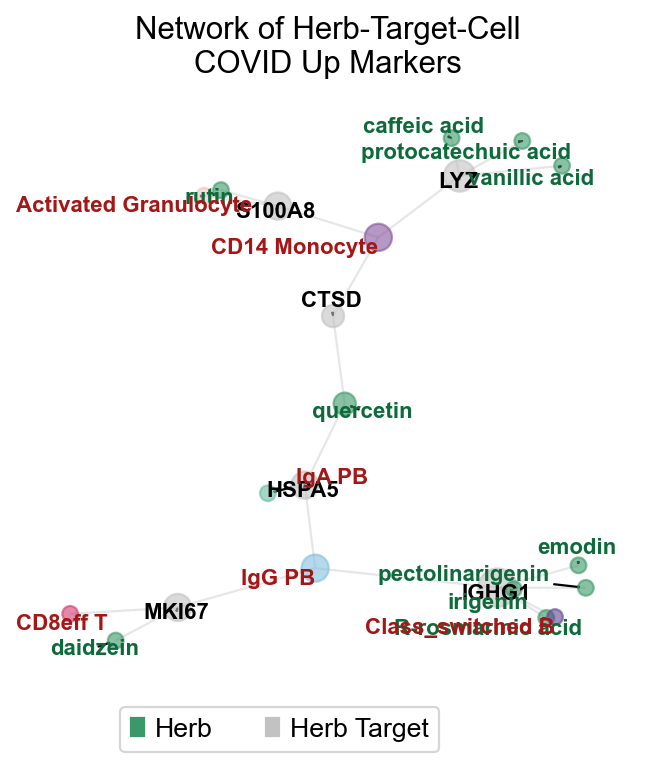

In [563]:
fig, ax = plt.subplots(figsize=(5,5))
pos2 = nx.spring_layout(G1, scale=0.5, k=0.01)
#pos=nx.kamada_kawai_layout(G,dim=2,scale=10)
nx.draw_networkx_edges(G1, pos2, nodelist=list(G1.nodes), alpha=0.4,edge_color='#c2c2c2')
degree_dict1 = dict(G1.degree(G1.nodes()))
#sorted(degree_dict.items(),key=lambda x: x[1],reverse=True)
nx.draw_networkx_nodes(
    G1,
    pos2,
    nodelist=list(G1.nodes),
    node_size=[degree_dict1[v]*50 for v in G1],
    node_color=color_li1,
    #cmap=c,
    alpha=0.6,
    linewidths=1,
)

hub_gene=list(set(G1.nodes) & set(all_target))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos2[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'black'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


hub_gene=list(set(G1.nodes) & set(herb['herb_id']))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos2[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           newjinhua.loc[i,'Name'],
           fontdict={'size':10,'weight':'bold','color':'#0d6a3b'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


hub_gene=list(set(G1.nodes) & set(marker_dict.keys()))
pos1=dict()
for i in hub_gene:
    pos1[i]=pos2[i]
from adjustText import adjust_text

texts=[ax.text(pos1[i][0], 
           pos1[i][1],
           i,
           fontdict={'size':10,'weight':'bold','color':'#a51616'}
           ) for i in hub_gene if 'ENSG' not in i]
adjust_text(texts,only_move={"text": "xy", "static": "xy", "explode": "xy", "pull": "xy"},
                    arrowprops=dict(arrowstyle='->', color='black'))


ax.axis("off")

labels = ['Herb','Herb Target']
labels_color=['#3b9868','#c2c2c2']
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend

patches = [ mpatches.Patch(color=labels_color[i], label="{:s}".format(labels[i]) ) for i in range(len(labels)) ] 
plt.title('Network of Herb-Target-Cell\nCOVID Up Markers',fontsize=14)
#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.legend(handles=patches,bbox_to_anchor=(0.7, 0), ncol=3,fontsize=12)

plt.savefig('figures/network_tcm_htc_sub.png',dpi=300,bbox_inches='tight')
plt.savefig('figures/network_tcm_htc_sub.pdf',dpi=300,bbox_inches='tight')

In [45]:
list(set(G1.nodes) & set(all_target))

['LYZ', 'MKI67', 'S100A8', 'CTSD', 'IGHG1', 'HSPA5']

In [54]:
len(list(set(herb['target']) & set(degs)))

45

In [55]:
adata

AnnData object with n_obs × n_vars = 44721 × 26361
    obs: 'Admission', 'ClusterID', 'DPS', 'DTF', 'Donor_full', 'HLA1', 'IFN1', 'Sex', 'Status', 'Ventilated', 'cell_type_coarse', 'cell_type_fine', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'percent_mt', 'percent_rpl', 'percent_rps', 'percent_rrna', 'seurat_clusters', 'singler', 'final_celltype_type', 'SEACell'
    var: 'Selected', 'sct_detection_rate', 'sct_gmean', 'sct_residual_mean', 'sct_residual_variance', 'sct_variable', 'sct_variance'
    uns: 'Status_colors', 'cell_type_fine_colors', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'pca_feature_loadings'
    layers: 'matrix', 'normlog'
    obsp: 'connectivities', 'distances'

In [57]:
herb.to_excel('result/herb_target.xlsx')